### Cubic spline interpolation

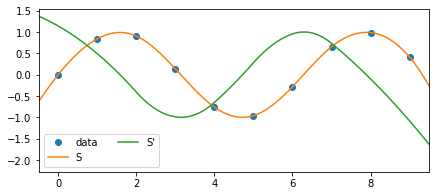

In [54]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 10, 0.1)
plt.figure(figsize=(7, 3))
plt.plot(x, y, 'o', label='data')
#plt.plot(xs, np.sin(xs), label='true')

plt.plot(xs, cs(xs), label="S")
#plt.plot(xs, cs(xs, 1), label="S'")
#plt.plot(xs, cs(xs, 2), label="S''")
#plt.plot(xs, cs(xs, 3), label="S'''")
plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left', ncol=2)
plt.show()

ds/dx=0.0 ds/dy=1.0


<ipython-input-17-0fa11d93edbf>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


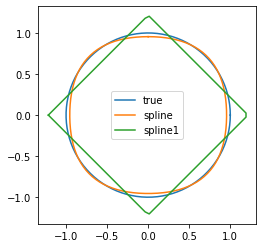

In [17]:
theta = 2 * np.pi * np.linspace(0, 1, 5)
y = np.c_[np.cos(theta), np.sin(theta)]
cs = CubicSpline(theta, y, bc_type='periodic')
print("ds/dx={:.1f} ds/dy={:.1f}".format(cs(0, 1)[0], cs(0, 1)[1]))

xs = 2 * np.pi * np.linspace(0, 1, 100)
plt.figure(figsize=(6.5, 4))
#plt.plot(y[:, 0], y[:, 1], 'o', label='data')
plt.plot(np.cos(xs), np.sin(xs), label='true')
plt.plot(cs(xs,1)[:, 0], cs(xs,1)[:, 1], label='spline')
plt.plot(cs(xs,2)[:, 0], cs(xs,2)[:, 1], label='spline1')
plt.axes().set_aspect('equal')
plt.legend(loc='center')
plt.show()

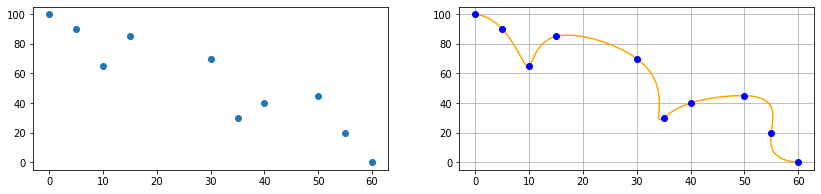

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

fig,axs = plt.subplots(1,2,figsize=(14,3))
timestamp = (0,5,10,15,30,35,40,50,55,60)
distance = (100,90,65,85,70,30,40,45,20,0)

data = np.array((timestamp,distance))
axs[0].plot(timestamp, distance, 'o')

# Now, onto the spline creation.  Note, that s=0 meaning 
# that we're forcing the spline fit to pass through all the input points
tck,u = interpolate.splprep(data, s=0)
unew = np.arange(0, 1.0, .001)
# Next, we apply the spline, giving us 101 values for time and for distance
out = interpolate.splev(unew, tck)
# Let's now plot the new spline over our original data points!
axs[1].plot(out[0], out[1], color='orange')
axs[1].plot(data[0,:], data[1,:], 'ob')
axs[1].grid()

### Comparision between Cubic Spline and Interpolation

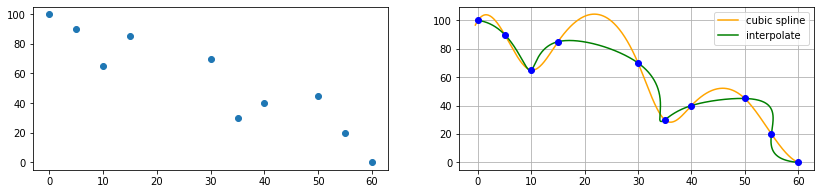

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import CubicSpline

fig,axs = plt.subplots(1,2,figsize=(14,3))
x = (0,5,10,15,30,35,40,50,55,60)
y = (100,90,65,85,70,30,40,45,20,0)
data = np.array((x,y))
axs[0].plot(x,y, 'o')

cs = CubicSpline(x, y)
xs = np.arange(-0.5, 60, 0.1)

tck,u = interpolate.splprep(data, s=0)
unew = np.arange(0, 1.0, .001)
out = interpolate.splev(unew, tck)
# Let's now plot the new spline over our original data points!
axs[1].plot(xs, cs(xs),color='orange',label="cubic spline")
axs[1].plot(out[0], out[1], color='green',label="interpolate")
axs[1].plot(x,y, 'ob')
axs[1].grid()
axs[1].legend()